## Exercício avaliativo
### Machine Learning
### Prof. Neylson Crepalde
### João Pedro Faria Silva

### ---------------------------------------

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sms
import scipy as sp
import scipy.stats
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
import random
%matplotlib inline

8)This question involves the use of simple linear regression on the Auto
data set.

(a) Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output.
For example:
        
    3. Linear Regression
    
    I. Is there a relationship between the predictor and the response?
    
    II. How strong is the relationship between the predictor and the response?
    
    III. Is the relationship between the predictor and the response positive or negative?
    
    IV. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction
    intervals?

(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

### Carregando o banco de dados Auto.csv

In [0]:
auto = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output.

In [0]:
model_auto_v1 = sms.ols(formula = "mpg ~ horsepower", data = auto).fit()

In [0]:
print(model_auto_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     12.60
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.79e-64
Time:                        16:09:21   Log-Likelihood:                -1065.5
No. Observations:                 397   AIC:                             2319.
Df Residuals:                     303   BIC:                             2694.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.5941      0.98

#### *Se somente extrairmos o banco de dados Auto.csv e usando a função ols, como resultado terá várias variáveis BETAS preditoras pois a variável está como objeto character e existem valores unicos. Poderemos transformar as variáveis da coluna 'horsepower' em numeric e se existir valores N'A, podemos substituir os NA's pela média da coluna.!

In [0]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [0]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

#### Vimos acima, a variável 'horsepower' está como objeto character e usando a função isnull() a coluna não apresenta valores missing. Se analisarmos o dataset veremos que existem 5 valores como '?' na coluna 'horsepower'.

In [0]:
x = [32,126,330,336,354,]
for i,valor in enumerate(x):
    print('Linha[{}] = {}'.format(valor,auto.horsepower[valor]))

Linha[32] = ?
Linha[126] = ?
Linha[330] = ?
Linha[336] = ?
Linha[354] = ?


#### Transformando as variáveis da coluna 'horsepower' em numeric, podemos observar que os valores '?' vão ser transformado em valores N'A.

In [0]:
auto['horsepower'] = pd.to_numeric(auto.horsepower, errors='coerce')

In [0]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

#### Agora podemos ver que existem 5 valores NA's, apesar de existir poucos valores missings, os missings podem comprometer a performance do nosso modelo. O próximo passo é substituir os valores missings, como existem poucos valores missings, podemos substitui-los pela média da coluna.

In [0]:
auto.horsepower.fillna(auto.horsepower.mean(), inplace=True)

In [0]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### Agora sim!!! 
### Com os dados transformados podemos fazer um novo modelo de regressão para ver o resultado.

In [0]:
model_auto_v2 = sms.ols(formula="mpg ~ horsepower", data=auto).fit()

In [0]:
print(model_auto_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           1.45e-79
Time:                        09:50:52   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0058      0.729     54.903      0.0

### I. Is there a relationship between the predictor and the response?

Sim, podemos observar a partir do p-value.

### II. How strong is the relationship between the predictor and the response?

A preditora 'horsepower' explica 59% do modelo, podemos perceber que apenas uma variável já explica mais da metade do modelo.

### III. Is the relationship between the predictor and the response positive or negative?

Negativa, para cada unidade de horsepower(potência em cavalos) menor é o mpg(milhas por galão).

### IV. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

Para o horsepower de 98, a mpg seria de aproximadamente 25,3.
Formula => 40 - 98*0,1578 = 24,53

In [0]:
mean_horsepower = auto.horsepower.mean()
std_erro_horsepower = np.std(auto.horsepower)

In [0]:
conf_int = scipy.stats.norm.interval(0.95, loc=mean_horsepower, scale=std_erro_horsepower)

In [0]:
print('Os valores para o intervalo de confiança de 95% está entre;')
print(conf_int)

Os valores para o intervalo de confiança de 95% está entre;
(29.60035626416746, 179.33841924603666)


### (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line

In [0]:
predition = model_auto_v2.predict()

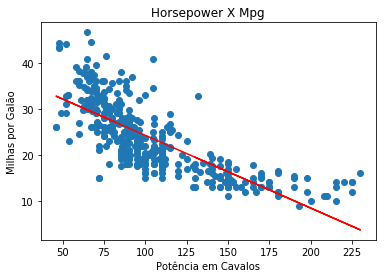

In [0]:
plt.scatter(x=auto['horsepower'],y=auto['mpg'])
plt.plot(auto['horsepower'], predition, color='red')
plt.title('Horsepower X Mpg')
plt.xlabel('Potência em Cavalos')
plt.ylabel('Milhas por Galão')
plt.show()

### (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

_____________________________________________________________________________________________________________________

9) This question involves the use of multiple linear regression on the Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

(b) Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable, cor() which is qualitative.

(c) Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance:
    
    I. Is there a relationship between the predictors and the response?
    
    II. Which predictors appear to have a statistically significant relationship to the response?
    
    III. What does the coefficient for the year variable suggest?
    
(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

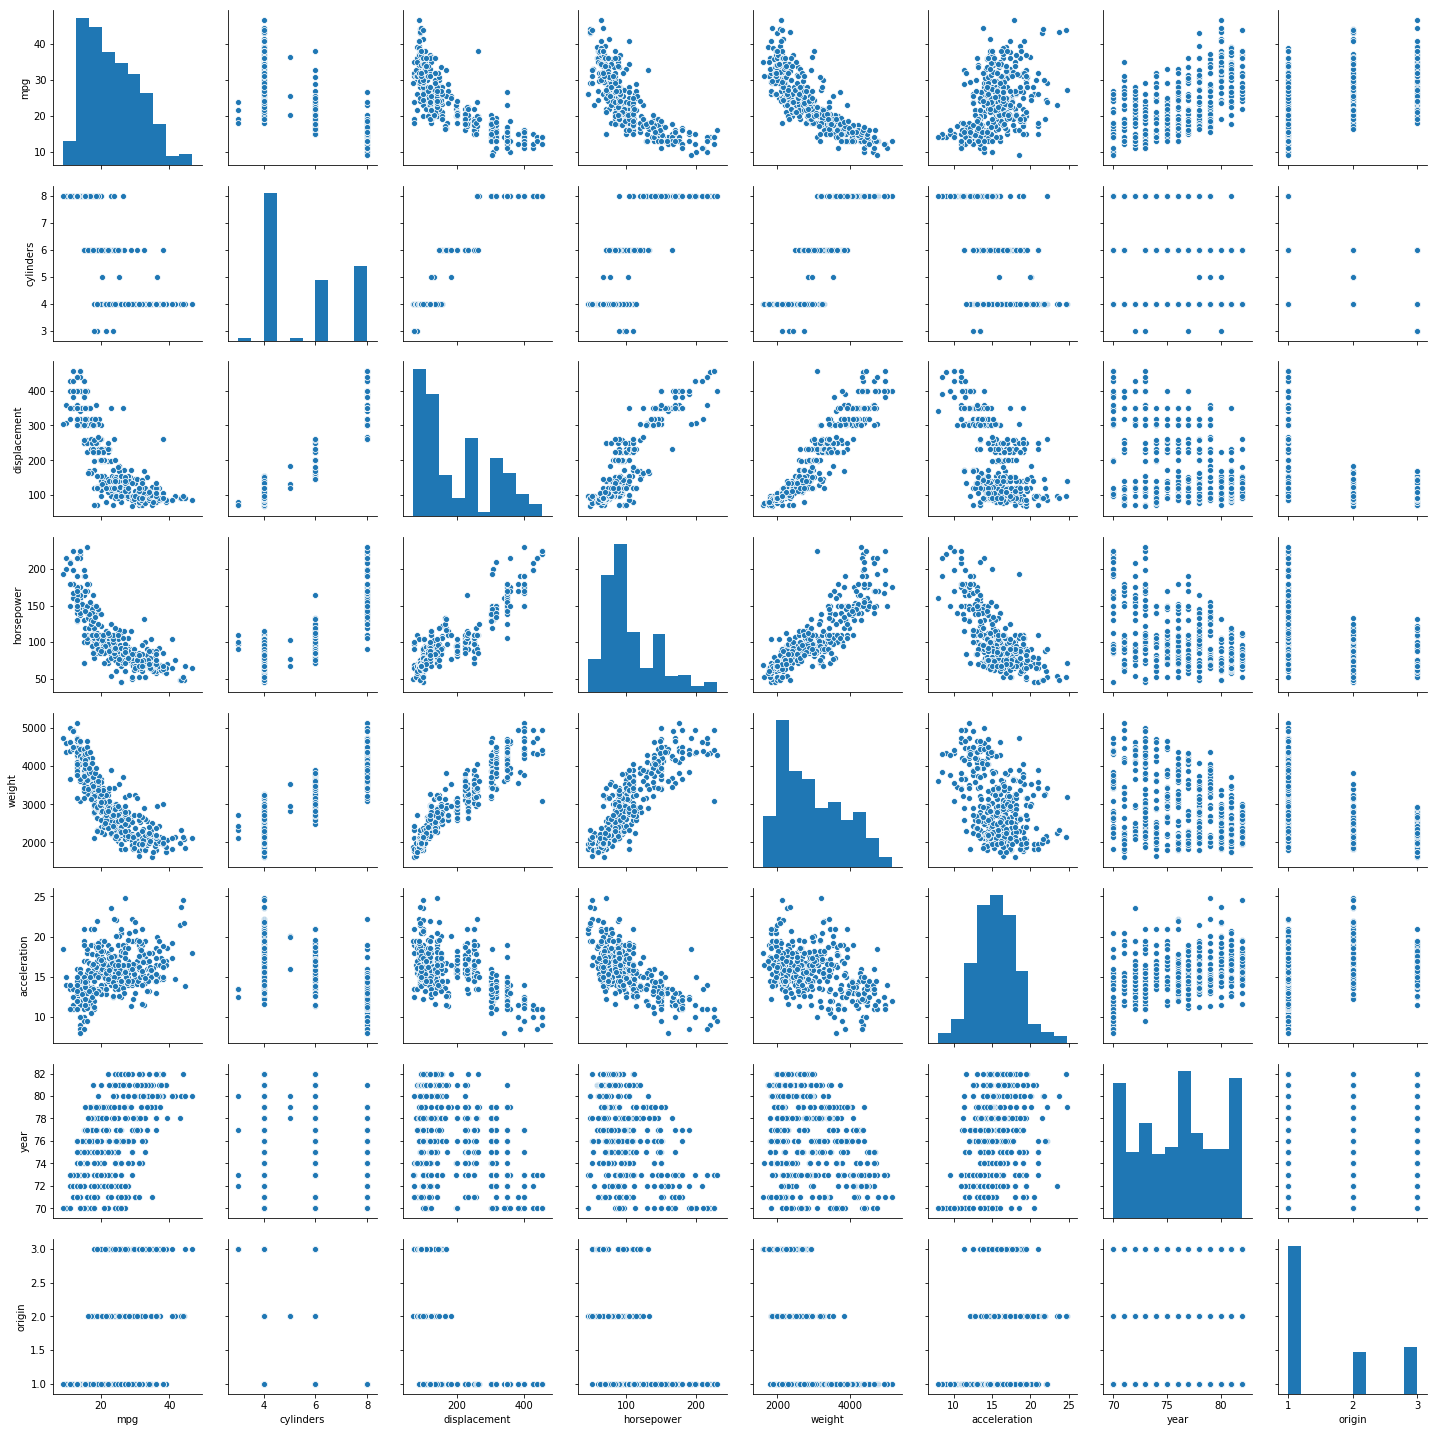

In [0]:
sns.pairplot(auto)

### (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative.

In [0]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000


### (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

In [0]:
model_auto_v3 = sms.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
                       data = auto).fit()

In [0]:
print(model_auto_v3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 08 Apr 2019   Prob (F-statistic):          2.41e-141
Time:                        10:10:02   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.7116      4.609     -4.060   

### I. Is there a relationship between the predictors and the response?

Sim, apesar de nem todas as variáveis ser significativa podemos percebar analisando o p-value de cada variável.

### II. Which predictors appear to have a statistically significant relationship to the response?

Segundo o modelo_auto_v3, as variáveis significativas apresentadas são, displacement, weight, year e origin

### III. What does the coefficient for the year variable suggest?

A variável representa 'Ano' e segundo o modelo_auto_v3 para cada unidade de year, acrecenta 0.76 de unidade na variável 'mpg', em outras palavras, o valor de mpg aumenta a cada ano que passa.

### (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [0]:
# model values
model_fitted_y = model_auto_v3.fittedvalues
# model residuals
model_residuals = model_auto_v3.resid
# normalized residuals
model_norm_residuals = model_auto_v3.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_auto_v3.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_auto_v3.get_influence().cooks_distance[0]

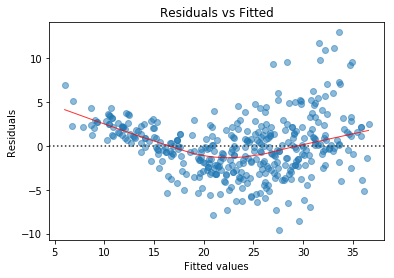

In [0]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, auto.columns[0], data=auto,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

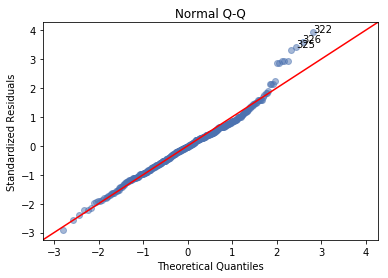

In [0]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

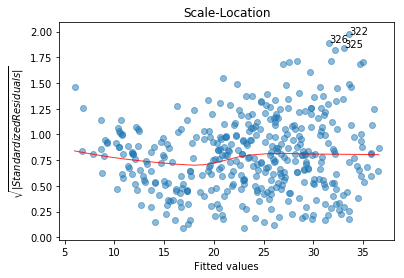

In [0]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                               xy=(model_fitted_y[i],
                                   model_norm_residuals_abs_sqrt[i]));

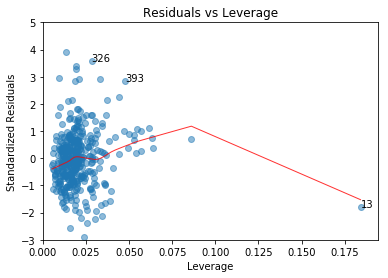

In [0]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                               xy=(model_leverage[i],
                                   model_norm_residuals[i]));

### Podemos perceber nos gráficos residuais que;
    - No gráfico 'Normal Q-Q' existe uma distribuição normal para a direita.
    - No gráfico 'Scale-Location' percebe-se uma variância constante.
    - Segundo o gráfico 'Residuals vs Leverage' mostra um possível valor outlier(nº13)

_____________________________________________________________________________________________________________________

10) This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price,Urban, and US.

(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?
    
(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

(f) How well do the models in (a) and (e) fit the data?

(g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

### Carregando o banco de dados Auto.csv

In [0]:
carset = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')
carset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [0]:
carset.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### (a) Fit a multiple regression model to predict Sales using Price,Urban, and US.

In [0]:
model_carset_v1 = sms.ols(formula = 'Sales ~ Price + Urban + US', data = carset).fit()

### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

In [0]:
print(model_carset_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           2.39e-23
Time:                        13:15:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

Os coeficientes;
    - Urban[T.Yes] -> Apresenta um decréscimo de -0.0219 em relação ao Urban[No]
    - US[T.Yes] -> Apresenta um acrescimo de 1.2006 em relação ao US[No]
    - Price -> Apresenta um decréscimo de -0.0545
    
Alguns pontos;
    - Segundo o modelo a venda de uma loja não está relacionada se ela está em aréa urbana ou não, podemos ver que o p-value
        da variável Urban não é significativo.
    - Uma loja que está nos Estados Unidos vende(1.2006) mais do que uma loja que não está

### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

y = B0 + B1xz¹ + B2xz² + B3xz¹ + B4xz² + B5x + e

y = Variável preditora

B0 = Intercepto da reta com o eixo y

B1xz¹ = Urban[T.Yes]

B2xz² = Urban[T.No]

B3xz¹ = US[T.Yes]

B4xz² = US[T.No]

B5x = Price

e = erros residuais

### (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

Para o preditor Urban, pois ele não é estatisticamente significativo segundo o p-value.

### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [0]:
model_carset_v2 = sms.ols(formula = 'Sales ~ Price + US', data = carset).fit()
print(model_carset_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           2.66e-24
Time:                        14:33:47   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### (f) How well do the models in (a) and (e) fit the data?

Com base no R-squared dos dois modelos, os dois modelos estão bem ruins, pois os dois explicam apenas 24% da variável resposta.

### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [0]:
mean_carset_Price = carset.Price.mean()
std_carset_Price = carset.Price.std()

In [0]:
conf_int_carset = scipy.stats.norm.interval(0.95, loc=mean_carset_Price, scale=std_carset_Price)

In [0]:
print('Os valores para o intervalo de confiança de 95% está entre;')
print(conf_int_carset)

Os valores para o intervalo de confiança de 95% está entre;
(69.38959054417646, 162.20040945582355)


In [0]:
model_carset_v2.conf_int(0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


* Fiqui na dúvida sobre os dois comandos, o scipy.norm.interval e o conf_int

### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

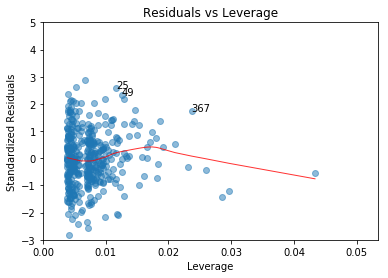

In [0]:
# normalized residuals
model_norm_residuals2 = model_carset_v2.get_influence().resid_studentized_internal
# leverage, from statsmodels internals
model_leverage2 = model_carset_v2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks2 = model_carset_v2.get_influence().cooks_distance[0]

plot_lm_5 = plt.figure();
plt.scatter(model_leverage2, model_norm_residuals2, alpha=0.5);
sns.regplot(model_leverage2, model_norm_residuals2,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_5.axes[0].set_xlim(0, max(model_leverage2)+0.01)
plot_lm_5.axes[0].set_ylim(-3, 5)
plot_lm_5.axes[0].set_title('Residuals vs Leverage')
plot_lm_5.axes[0].set_xlabel('Leverage')
plot_lm_5.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_4 = np.flip(np.argsort(model_cooks2), 0)[:3]
for i in leverage_top_4:
    plot_lm_5.axes[0].annotate(i,
                               xy=(model_leverage2[i],
                                   model_norm_residuals2[i]));

Sim !!! Como podemos ver no gráfico acima.

_____________________________________________________________________________________________________________________

13) In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

(a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

(b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

(c) Using x and eps, generate a vector y according to the model Y = −1+0.5X + . (3.39) What is the length of the vector y? What are the values of β0 and β1 in this linear model?

(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.

(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term in (b). Describe your results.

(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the
error term  in (b). Describe your results.

(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

### (a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [0]:
np.random.seed(1)
x = np.random.normal(loc=0,scale=1,size=100)
print(x)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
  0.90085595 -0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547
 -0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416 -0.19183555 -0.88762896
 -0.74715829  1.6924546   0.05080775 -0.63699565  0.19091548  2.10025514
  0.12015895  0.61720311  0.30017032 -0.35224985 -1.1425182  -0.34934272
 -0.20889423  0.58662319  0.83898341  0.93110208  0.28558733  0.88514116
 -0.75439794  1.25286816  0.51292982 -0.29809284  0.48851815 -0.07557171
  1.13162939  1.51981682  2.18557541 -1.39649634 -1.44411381 -0.50446586
  0.16003707  0.87616892  0.31563495 -2.02220122 -0.30620401  0.82797464
  0.23009474  0.76201118 -0.22232814 -0.20075807  0.1

### (b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [0]:
np.random.seed(1)
eps = np.random.normal(loc=0,scale=0.25,size=100)
print(eps)

[ 0.40608634 -0.1529391  -0.13204294 -0.26824216  0.21635191 -0.57538467
  0.43620294 -0.19030173  0.07975977 -0.06234259  0.36552698 -0.51503518
 -0.0806043  -0.09601359  0.28344236 -0.27497282 -0.04310705 -0.2194646
  0.01055344  0.1457038  -0.27515479  0.28618093  0.22539768  0.12562358
  0.22521399 -0.17093196 -0.03072256 -0.23394236 -0.06697202  0.13258887
 -0.17291519 -0.09918838 -0.17179318 -0.21130141 -0.16781153 -0.00316615
 -0.27932759  0.05860392  0.41495054  0.18551104 -0.04795889 -0.22190724
 -0.18678957  0.42311365  0.01270194 -0.15924891  0.04772887  0.52506378
  0.03003974  0.15430078  0.07504258 -0.08806246 -0.28562955 -0.08733568
 -0.05222356  0.1466558   0.20974585  0.23277552  0.07139683  0.22128529
 -0.18859949  0.31321704  0.12823246 -0.07452321  0.12212954 -0.01889293
  0.28290735  0.3799542   0.54639385 -0.34912408 -0.36102845 -0.12611647
  0.04000927  0.21904223  0.07890874 -0.5055503  -0.076551    0.20699366
  0.05752368  0.1905028  -0.05558204 -0.05018952  0.

### (c) Using x and eps, generate a vector y according to the model Y = −1+0.5X + e . What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [0]:
y = -1+0.5*x+eps
len(y)

100

B0 -> O valor B0 segundo a formula vale -1.

B1 -> O valor B1 segundo a formula vale 0.5.

### (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

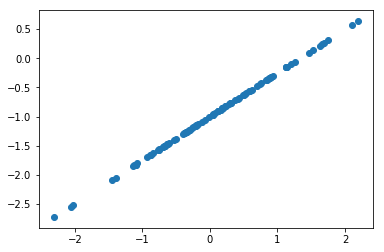

In [0]:
plt.scatter(x=x, y=y)
plt.show()

No gráfico podemos observar que ele tem uma distribuição normal perfeita.

### (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [0]:
dic = {'X': x, 'Y': y}
df_x_y = pd.DataFrame(dic)
model_x_y = sms.ols(formula='y ~ x', data=df_x_y).fit()
print(model_x_y.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.336e+33
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:21:05   Log-Likelihood:                 3483.6
No. Observations:                 100   AIC:                            -6963.
Df Residuals:                      98   BIC:                            -6958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0000   1.82e-17  -5.49e+16      0.0

O βˆ0 βˆ1 e o β0 β1 são praticamente iguais. Como esperado, β ^ 0 e β ^ 1 são estatisticamente signficantes.

### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.

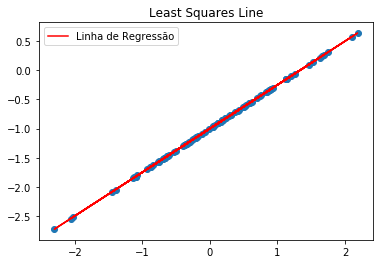

In [0]:
predition = model_x_y.predict()
plt.scatter(x=df_x_y['X'],y=df_x_y['Y'])
plt.plot(df_x_y['X'], predition, color='red')
plt.legend(['Linha de Regressão'])
plt.title('Least Squares Line')
plt.show()

### (g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [0]:
df_x_y['Z'] = df_x_y['X']**2
model_x_y_poly = sms.ols(formula='y ~ Z', data=df_x_y).fit()
print(model_x_y_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8595
Date:                Mon, 08 Apr 2019   Prob (F-statistic):              0.356
Time:                        16:40:07   Log-Likelihood:                -100.49
No. Observations:                 100   AIC:                             205.0
Df Residuals:                      98   BIC:                             210.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9984      0.082    -12.206      0.0

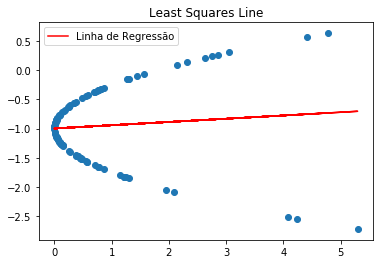

In [0]:
predition = model_x_y_poly.predict()
plt.scatter(x=df_x_y['Z'],y=df_x_y['Y'])
plt.plot(df_x_y['Z'], predition, color='red')
plt.legend(['Linha de Regressão'])
plt.title('Least Squares Line')
plt.show()

O termo quadratico não é estatisticamente significativo para esse caso, podemos ver pelo gráfico e pelo p-value na descrição do modelo.

### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term in (b). Describe your results.

In [0]:
np.random.seed(1)
x_2 = np.random.normal(loc=0,scale=1,size=100)
print(x)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
  0.90085595 -0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547
 -0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416 -0.19183555 -0.88762896
 -0.74715829  1.6924546   0.05080775 -0.63699565  0.19091548  2.10025514
  0.12015895  0.61720311  0.30017032 -0.35224985 -1.1425182  -0.34934272
 -0.20889423  0.58662319  0.83898341  0.93110208  0.28558733  0.88514116
 -0.75439794  1.25286816  0.51292982 -0.29809284  0.48851815 -0.07557171
  1.13162939  1.51981682  2.18557541 -1.39649634 -1.44411381 -0.50446586
  0.16003707  0.87616892  0.31563495 -2.02220122 -0.30620401  0.82797464
  0.23009474  0.76201118 -0.22232814 -0.20075807  0.1

In [0]:
np.random.seed(1)
eps_2 = np.random.normal(loc=0,scale=0.10,size=100)
print(eps)

[ 0.40608634 -0.1529391  -0.13204294 -0.26824216  0.21635191 -0.57538467
  0.43620294 -0.19030173  0.07975977 -0.06234259  0.36552698 -0.51503518
 -0.0806043  -0.09601359  0.28344236 -0.27497282 -0.04310705 -0.2194646
  0.01055344  0.1457038  -0.27515479  0.28618093  0.22539768  0.12562358
  0.22521399 -0.17093196 -0.03072256 -0.23394236 -0.06697202  0.13258887
 -0.17291519 -0.09918838 -0.17179318 -0.21130141 -0.16781153 -0.00316615
 -0.27932759  0.05860392  0.41495054  0.18551104 -0.04795889 -0.22190724
 -0.18678957  0.42311365  0.01270194 -0.15924891  0.04772887  0.52506378
  0.03003974  0.15430078  0.07504258 -0.08806246 -0.28562955 -0.08733568
 -0.05222356  0.1466558   0.20974585  0.23277552  0.07139683  0.22128529
 -0.18859949  0.31321704  0.12823246 -0.07452321  0.12212954 -0.01889293
  0.28290735  0.3799542   0.54639385 -0.34912408 -0.36102845 -0.12611647
  0.04000927  0.21904223  0.07890874 -0.5055503  -0.076551    0.20699366
  0.05752368  0.1905028  -0.05558204 -0.05018952  0.

In [0]:
y_2 = -1+0.5*x_2+eps_2
len(y)

100

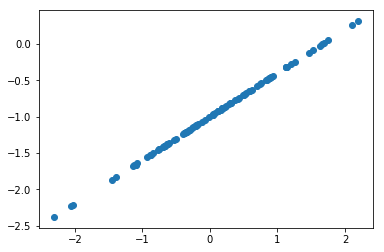

In [0]:
plt.scatter(x=x_2, y=y_2)
plt.show()

In [0]:
dic_2 = {'X_2': x_2, 'Y_2': y_2}
df_x_y_2 = pd.DataFrame(dic_2)
model_x_y_2 = sms.ols(formula='y_2 ~ x_2', data=df_x_y_2).fit()
print(model_x_y_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    y_2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.465e+33
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:54:43   Log-Likelihood:                 3510.5
No. Observations:                 100   AIC:                            -7017.
Df Residuals:                      98   BIC:                            -7012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0000   1.39e-17  -7.19e+16      0.0

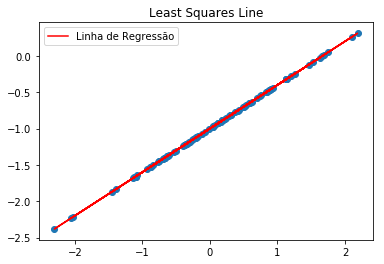

In [0]:
predition_2 = model_x_y_2.predict()
plt.scatter(x=df_x_y_2['X_2'],y=df_x_y_2['Y_2'])
plt.plot(df_x_y_2['X_2'], predition_2, color='red')
plt.legend(['Linha de Regressão'])
plt.title('Least Squares Line')
plt.show()

In [0]:
df_x_y_2['Z_2'] = df_x_y_2['X_2']**2
model_x_y_poly_2 = sms.ols(formula='y_2 ~ Z_2', data=df_x_y_2).fit()
print(model_x_y_poly_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    y_2   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8595
Date:                Mon, 08 Apr 2019   Prob (F-statistic):              0.356
Time:                        16:54:45   Log-Likelihood:                -78.176
No. Observations:                 100   AIC:                             160.4
Df Residuals:                      98   BIC:                             165.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9987      0.065    -15.263      0.0

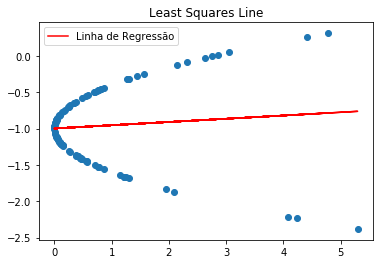

In [0]:
predition_2 = model_x_y_poly_2.predict()
plt.scatter(x=df_x_y_2['Z_2'],y=df_x_y_2['Y_2'])
plt.plot(df_x_y_2['Z_2'], predition_2, color='red')
plt.legend(['Linha de Regressão'])
plt.title('Least Squares Line')
plt.show()

Segundo o model_x_y_poly_2 diminuindo a variância do eps ainda não é estatisticamente significativo.

### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term in (b). Describe your results.

In [0]:
np.random.seed(1)
x_3 = np.random.normal(loc=0,scale=1,size=100)

In [0]:
np.random.seed(1)
eps_3 = np.random.normal(loc=0,scale=0.50,size=100)

y_3 = -1+0.5*x_2+eps_3
len(y)

100

In [0]:
dic_3 = {'X_3': x_3, 'Y_3': y_3}
df_x_y_3 = pd.DataFrame(dic_3)
df_x_y_3['Z_3'] = df_x_y_3['X_3']**2
model_x_y_poly_3 = sms.ols(formula='y_3 ~ Z_3', data=df_x_y_3).fit()
print(model_x_y_poly_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    y_3   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8595
Date:                Mon, 08 Apr 2019   Prob (F-statistic):              0.356
Time:                        17:02:10   Log-Likelihood:                -129.26
No. Observations:                 100   AIC:                             262.5
Df Residuals:                      98   BIC:                             267.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9978      0.109     -9.150      0.0

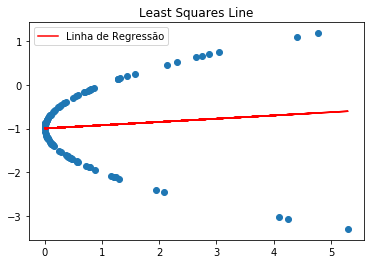

In [0]:
predition_3 = model_x_y_poly_3.predict()
plt.scatter(x=df_x_y_3['Z_3'],y=df_x_y_3['Y_3'])
plt.plot(df_x_y_3['Z_3'], predition_3, color='red')
plt.legend(['Linha de Regressão'])
plt.title('Least Squares Line')
plt.show()

Segundo o model_x_y_poly_3 o aumento da variância do eps também ainda não é estatisticamente significativo.

### (j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

_____________________________________________________________________________________________________________________

15) This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + .